# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
17

17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
# df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')
bank_depo = pd.read_csv('bank-additional-full.csv', sep = ';')

In [4]:
bank_depo.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
bank_depo['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

In [6]:
bank_depo['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

#### Need to turn into 3 categories: retired, with_income, no_income, and turn into dummy variables

In [7]:
bank_depo['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

#### Marital status should not matter, will need to drop it

In [8]:
bank_depo['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

#### Education need to turn into number, higher the education level, higher the number

In [9]:
bank_depo['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

#### There is a huge number of unknown in default data, so this data is not reliable. We need to drop it

In [10]:
bank_depo['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

#### Need to turn housing into dummy

In [11]:
bank_depo['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

#### Also need to turn personal lone into dummy

In [12]:
bank_depo['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [13]:
bank_depo.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### There is no NA, so we do not have to clean further more

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [15]:
bank_depo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### The bank needs to minimized the number of call that they make for the survey.
#### So they need to understand which categories of people to target to sell their term deposit product.
#### The data include the characteristics of the people they called, and the result of whether they have term deposit or not.
#### We can construct models to evalucate their accuracy, and pick the most suitable one.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [16]:
X = bank_depo[['age','job','education','housing','loan']]

In [17]:
X.head()

,age,job,education,housing,loan
0,56,housemaid,basic.4y,no,no
1,57,services,high.school,no,no
2,37,services,high.school,yes,no
3,40,admin.,basic.6y,no,no
4,56,services,high.school,no,yes


In [18]:
y = bank_depo['y']

#### Turn job data into 3 columns, with_income, no_income, and retired

In [19]:
bank_depo['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [20]:
X['job'] = X['job'].str.replace('unknown','no_income').str.replace('admin.','with_income').str.replace('blue-collar','with_income').str.replace('technician','with_income').str.replace('services','with_income').str.replace('management','with_income').str.replace('entrepreneur','with_income').str.replace('self-employed','with_income').str.replace('housemaid','with_income').str.replace('student','no_income').str.replace('unemployed','no_income')

C:\Users\aaron\AppData\Local\Temp\ipykernel_12372\2785819481.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X['job'] = X['job'].str.replace('unknown','no_income').str.replace('admin.','with_income').str.replace('blue-collar','with_income').str.replace('technician','with_income').str.replace('services','with_income').str.replace('management','with_income').str.replace('entrepreneur','with_income').str.replace('self-employed','with_income').str.replace('housemaid','with_income').str.replace('student','no_income').str.replace('unemployed','no_income')
C:\Users\aaron\AppData\Local\Temp\ipykernel_12372\2785819481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['job'] = X['job'].str.replace('

In [21]:
X_job = pd.get_dummies(X['job'])
X = pd.merge(X, X_job, left_index=True, right_index=True)
X = X.drop(['job'], axis=1)

In [22]:
X.head()

,age,education,housing,loan,no_income,retired,with_income
0,56,basic.4y,no,no,0,0,1
1,57,high.school,no,no,0,0,1
2,37,high.school,yes,no,0,0,1
3,40,basic.6y,no,no,0,0,1
4,56,high.school,no,yes,0,0,1


#### Turn lone and housing into dummy columns

In [23]:
X['loan'] = X['loan'].str.replace('yes','with_loan').str.replace('no','no_loan').str.replace('unknown','unknown_loan')
X_loan = pd.get_dummies(X['loan'])
X = pd.merge(X, X_loan, left_index=True, right_index=True)
X = X.drop(['loan'], axis=1)

In [24]:
X['housing'] = X['housing'].str.replace('yes','with_house_loan').str.replace('no','no_houes_loan').str.replace('unknown','unknown_house_loan')

X_housing = pd.get_dummies(X['housing'])
X = pd.merge(X, X_housing, left_index=True, right_index=True)
X = X.drop(['housing'], axis=1)

#### Turn education into a number

In [25]:
X['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [26]:
X['education'] = X['education'].str.replace('illiterate','0').str.replace('basic.4y','1').str.replace('basic.6y','2').str.replace('unknown','3').str.replace('basic.9y','4').str.replace('high.school','5').str.replace('professional.course','6').str.replace('university.degree','7')


C:\Users\aaron\AppData\Local\Temp\ipykernel_12372\2485119037.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X['education'] = X['education'].str.replace('illiterate','0').str.replace('basic.4y','1').str.replace('basic.6y','2').str.replace('unknown','3').str.replace('basic.9y','4').str.replace('high.school','5').str.replace('professional.course','6').str.replace('university.degree','7')


In [27]:
X['education'] = X['education'].astype(int)


In [28]:
X.head()

,age,education,no_income,retired,with_income,no_loan,unkno_loanwn,with_loan,no_houes_loan,unkno_houes_loanwn,with_house_loan
0,56,1,0,0,1,1,0,0,1,0,0
1,57,5,0,0,1,1,0,0,1,0,0
2,37,5,0,0,1,1,0,0,0,0,1
3,40,2,0,0,1,1,0,0,1,0,0
4,56,5,0,0,1,0,0,1,1,0,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 41188 non-null  int64
 1   education           41188 non-null  int32
 2   no_income           41188 non-null  uint8
 3   retired             41188 non-null  uint8
 4   with_income         41188 non-null  uint8
 5   no_loan             41188 non-null  uint8
 6   unkno_loanwn        41188 non-null  uint8
 7   with_loan           41188 non-null  uint8
 8   no_houes_loan       41188 non-null  uint8
 9   unkno_houes_loanwn  41188 non-null  uint8
 10  with_house_loan     41188 non-null  uint8
dtypes: int32(1), int64(1), uint8(9)
memory usage: 844.8 KB


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [32]:
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
knn_pipe.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

In [33]:
knn_preds = knn_pipe.predict(X_test)


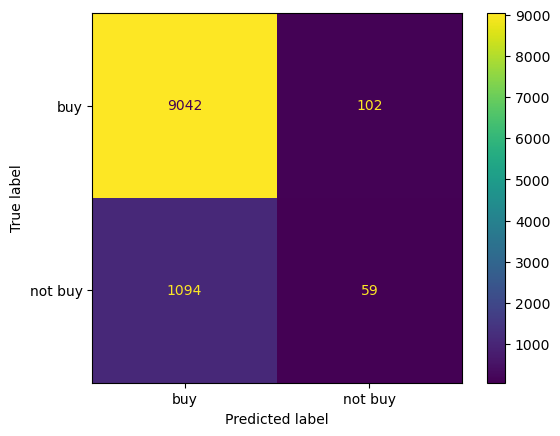

In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

bank_confusion_mat = confusion_matrix(y_test, knn_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=bank_confusion_mat, display_labels=['buy', 'not buy' ])
disp.plot()
plt.show()


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_pipe = Pipeline([('scale', StandardScaler()), ('log', LogisticRegression())])
log_pipe.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()), ('log', LogisticRegression())])

In [37]:
log_preds = log_pipe.predict(X_test)


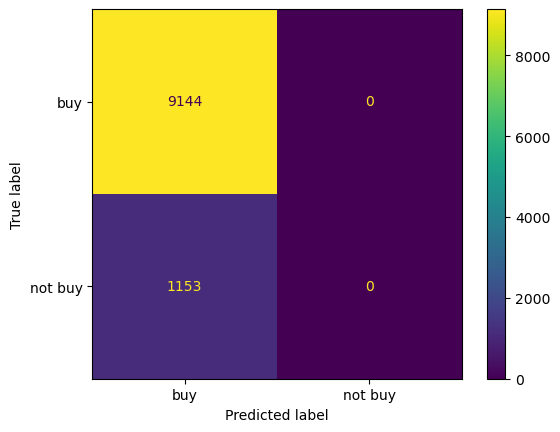

In [38]:
bank_confusion_mat = confusion_matrix(y_test, log_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=bank_confusion_mat, display_labels=['buy', 'not buy' ])
disp.plot()
plt.show()


### Problem 9: Score the Model

What is the accuracy of your model?

In [39]:
# Accuracy for KNN is
(9042 + 59)/(9042 + 102 + 59 + 1094)

0.8838496649509566

In [40]:
# Accuracy for Logistic regression is 
(9144 + 0)/(9144+0+1153+0)

0.8880256385354958

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
tree_pred = tree_model.predict(X_test)

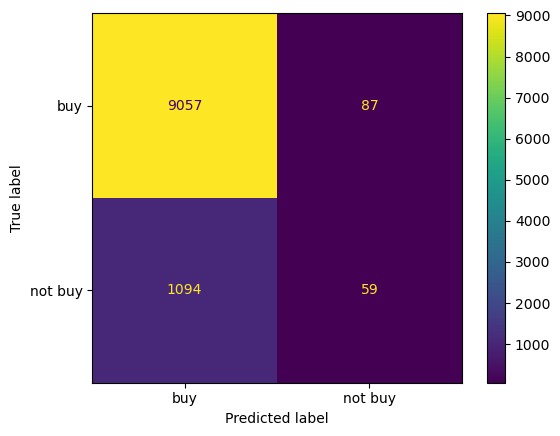

In [43]:
bank_confusion_mat = confusion_matrix(y_test, tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=bank_confusion_mat, display_labels=['buy', 'not buy' ])
disp.plot()
plt.show()


### SVM

In [44]:
from sklearn.svm import SVC


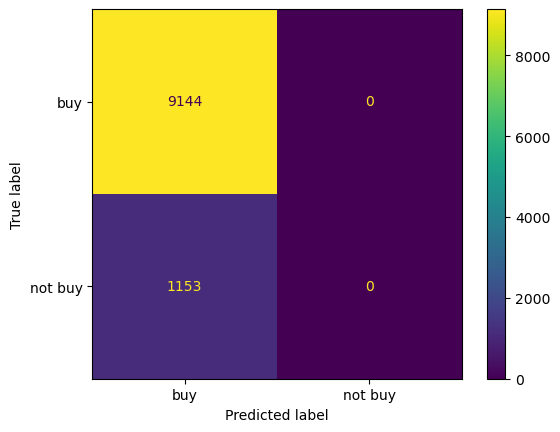

In [45]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
bank_confusion_mat = confusion_matrix(y_test, svc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=bank_confusion_mat, display_labels=['buy', 'not buy' ])
disp.plot()
plt.show()


### From the results above, it seems like logistic regression and SVM have better accuracy, but a lot more false positive.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Improving KNN model

In [46]:
## We can improve KNN by using grid seacch with different number of neighbor
from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(knn_pipe, param_grid={'knn__n_neighbors': range(1, 33, 2)}, scoring = 'roc_auc')
knn_grid.fit(X_train, y_train)
best_k = knn_grid.best_params_['knn__n_neighbors']


In [47]:
best_k

29

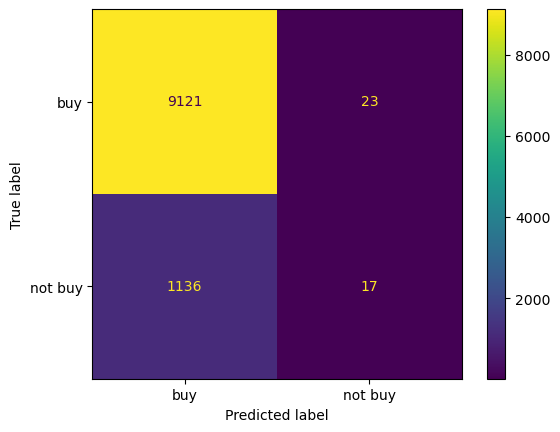

In [48]:
knn_new_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=29))])
knn_new_pipe.fit(X_train, y_train)
knn_new_preds = knn_new_pipe.predict(X_test)
bank_confusion_mat = confusion_matrix(y_test, knn_new_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=bank_confusion_mat, display_labels=['buy', 'not buy' ])
disp.plot()
plt.show()

### improving Logistic Regression model

In [50]:
# We can improve Logistic regression by finding the optimal C of l1 regularization.
# scale the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [51]:
# find the optimal value of C
import numpy as np

Cs = np.logspace(-2, 2)
coef_list = []

for C in Cs:
    lgr = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = C, random_state=42, max_iter = 1000).fit(scaled_X_train, y_train)
    coef_list.append(list(lgr.coef_[0]))
    print(lgr.coef_)


coef_list[0]


[[ 0.          0.15972322  0.          0.05130538 -0.23155485  0.
   0.          0.          0.          0.          0.        ]]
[[ 0.          0.16726193  0.          0.05388541 -0.23498399  0.
   0.          0.          0.          0.          0.00397064]]
[[ 0.          0.17355387  0.          0.05604909 -0.2378004   0.
   0.          0.          0.          0.          0.00845175]]
[[ 0.          0.17883169  0.          0.0578305  -0.24016952  0.
   0.          0.          0.          0.          0.01219369]]
[[ 0.          0.18324475  0.          0.05930739 -0.2421372   0.
   0.          0.          0.          0.          0.01531452]]
[[ 0.          0.1869244   0.          0.06053074 -0.24377229  0.
   0.          0.          0.          0.          0.01791533]]
[[ 0.          0.19000348  0.          0.06153337 -0.24515125  0.
   0.          0.          0.          0.          0.02007915]]
[[ 0.          0.19256797  0.          0.06239954 -0.246276    0.
   0.          0.       

[0.0,
 0.15972322227193816,
 0.0,
 0.05130538267901207,
 -0.23155484833483742,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [52]:
np.logspace(-2, 2)

array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3.55648031e-01,
       4.29193426e-01, 5.17947468e-01, 6.25055193e-01, 7.54312006e-01,
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])

In [53]:
# create the new improved model
new_lgr = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.01, random_state=42, max_iter = 1000).fit(scaled_X_train, y_train)



In [54]:
new_log_preds = new_lgr.predict(scaled_X_test)


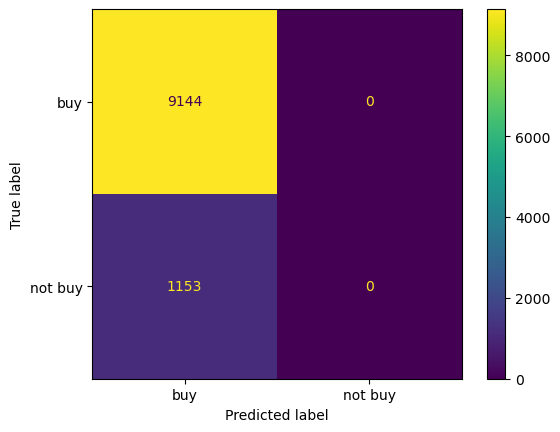

In [55]:
bank_confusion_mat = confusion_matrix(y_test, new_log_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=bank_confusion_mat, display_labels=['buy', 'not buy' ])
disp.plot()
plt.show()


### improving decision tree

In [56]:
## Similarly we can improve decision tree by using grid seach with different parameters
params = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'max_depth': [2, 5, 10],
         'min_samples_split': [0.1, 0.2, 0.05]}

In [57]:
new_tree_grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X_train, y_train)


In [58]:
new_tree_pred = new_tree_grid.predict(X_test)

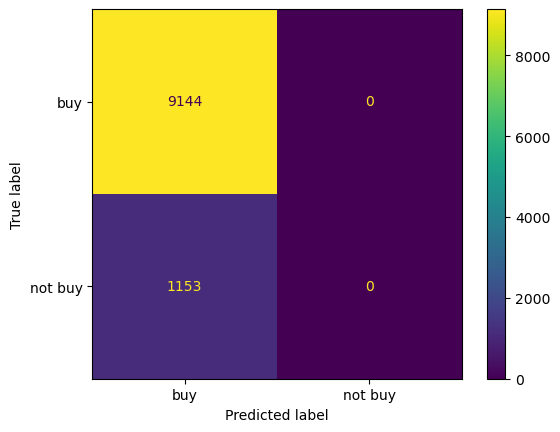

In [59]:
bank_confusion_mat = confusion_matrix(y_test, new_tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=bank_confusion_mat, display_labels=['buy', 'not buy' ])
disp.plot()
plt.show()


### Improving SVM

In [60]:
# We can try improve SVM by trying different type of kernels.
params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}

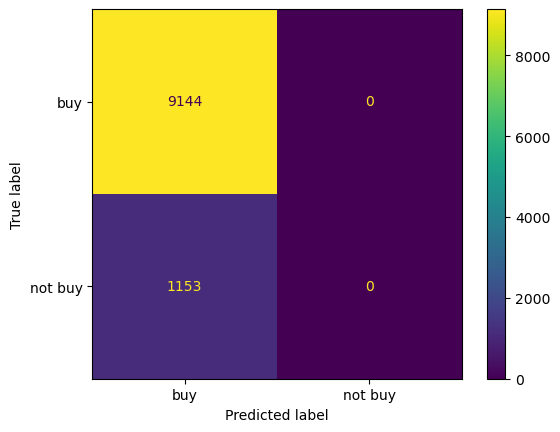

In [61]:
svc_grid = GridSearchCV(SVC(), param_grid=params).fit(X_train, y_train)
svc_grid.fit(X_train, y_train)
svc_new_pred = svc_grid.predict(X_test)
bank_confusion_mat = confusion_matrix(y_test, svc_new_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=bank_confusion_mat, display_labels=['buy', 'not buy' ])
disp.plot()
plt.show()


#### With the optimization techniques, it does not seems like they can further optimize the model. So we can recommend by just using the simple models. 